In [1]:
import pandas as pd

import numpy as np

import time,datetime

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import calendar

In [2]:
# Importing Data
data2 = pd.read_csv('boston_data.csv' )

In [3]:
#for displaying the rows
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# Droping the useless columns
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)


In [5]:
data2.columns
# Remaining Cloumns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [6]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
292857,69771426-9887-45ad-942a-3d90e9a1ec45,1.543315e+09,10,27,11,2018-11-27 10:42:22,America/New_York,Fenway,Theatre District,Uber,...,Light rain in the morning.,1.00,7.42,46.91,33.82,1543399200,rain,989.98,36.34,46.91
442907,22885750-73ec-4e95-ab39-c8141e54b9cd,1.543364e+09,0,28,11,2018-11-28 00:06:22,America/New_York,Boston University,West End,Uber,...,Light rain in the morning.,0.00,10.51,46.83,33.75,1543399200,clear-night,991.99,36.13,46.83
442584,eff4ec7e-d98a-475c-911b-7b8eb6f28b48,1.544973e+09,15,16,12,2018-12-16 15:10:11,America/New_York,Back Bay,South Station,Lyft,...,Rain throughout the day.,0.00,8.19,43.83,34.25,1545044400,cloudy,1020.18,39.22,43.83
638343,297a1d4c-7a22-41cd-814c-1447596d3b9b,1.544683e+09,6,13,12,2018-12-13 06:40:09,America/New_York,North End,Financial District,Uber,...,Partly cloudy throughout the day.,0.00,3.60,33.92,27.05,1544781600,clear-night,1028.56,18.05,33.92
445295,6c6f59bc-8448-4b28-8502-ab5021c37cf8,1.543348e+09,19,27,11,2018-11-27 19:54:23,America/New_York,Haymarket Square,Back Bay,Lyft,...,Light rain in the morning.,0.00,13.80,46.83,33.75,1543399200,partly-cloudy-day,990.25,36.13,46.83
193184,70641a38-5950-4923-ad8c-2439c31fb907,1.543708e+09,23,1,12,2018-12-01 23:43:02,America/New_York,Northeastern University,Beacon Hill,Uber,...,Light rain in the morning and overnight.,0.00,2.87,44.76,34.83,1543712400,partly-cloudy-night,1023.57,31.42,44.76
629616,0145eeb6-d109-479e-96e8-d88dbf5ba900,1.544714e+09,15,13,12,2018-12-13 15:05:11,America/New_York,South Station,Back Bay,Lyft,...,Partly cloudy throughout the day.,0.00,4.06,33.92,27.05,1544781600,partly-cloudy-day,1034.03,18.05,33.92
515157,0fdfd0d7-ea34-43ca-bbf4-a3ce9cd7ae7e,1.543682e+09,16,1,12,2018-12-01 16:37:59,America/New_York,Back Bay,Fenway,Lyft,...,Light rain in the morning and overnight.,0.00,4.95,44.66,35.04,1543712400,partly-cloudy-day,1022.43,31.71,44.66
199050,ccceef61-0310-48f0-9f18-e797865a22e2,1.543535e+09,23,29,11,2018-11-29 23:38:01,America/New_York,North End,Theatre District,Lyft,...,Partly cloudy throughout the day.,0.00,13.46,44.96,28.42,1543579200,partly-cloudy-night,1010.12,35.20,44.96
312119,33e436db-c498-40ca-bdc9-4a34e3ac1eff,1.543321e+09,12,27,11,2018-11-27 12:12:22,America/New_York,North End,Financial District,Uber,...,Light rain in the morning.,0.94,4.54,46.89,33.70,1543399200,rain,988.29,35.98,46.89


In [7]:
# Checking and Droping the missing values from all the data
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


In [8]:
# Analysis

Text(0.5, 1.0, 'Number of trips Vs hours')

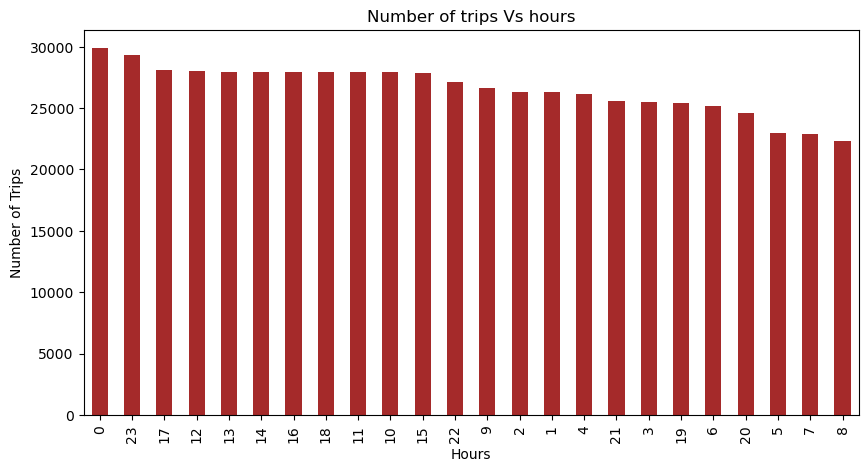

In [9]:
#  most common pick-up hours for Uber rides in Boston.
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [10]:
# This line creates a list of weekdays
day_week = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(data2['datetime'], format= "%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

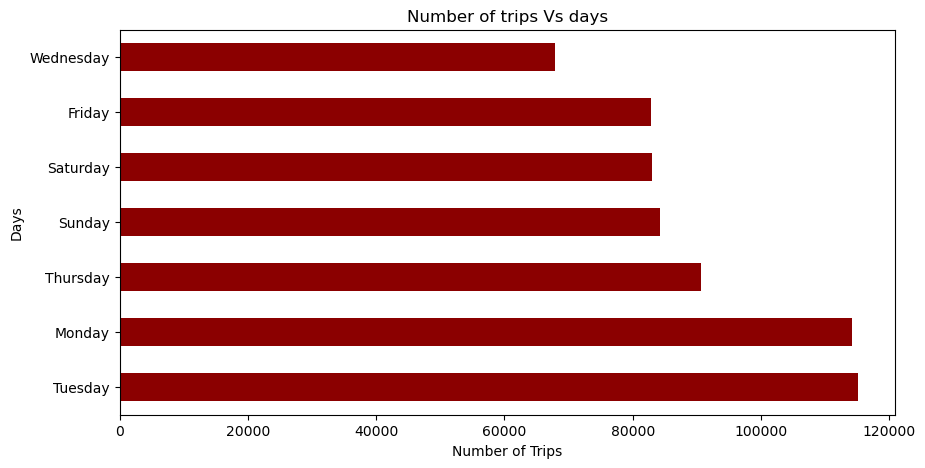

In [11]:
# Analysis as per the weekdays
days = day_week.value_counts()
days.plot(kind='barh', color= 'darkred', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

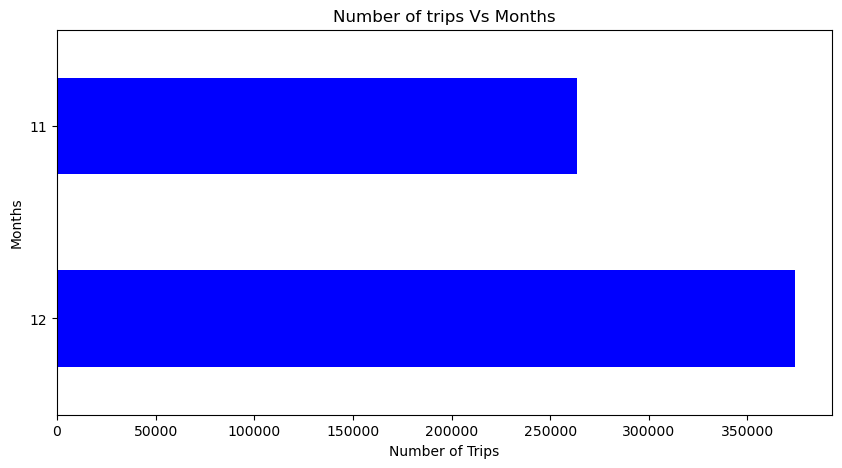

In [12]:
# Rides in last 2 months
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

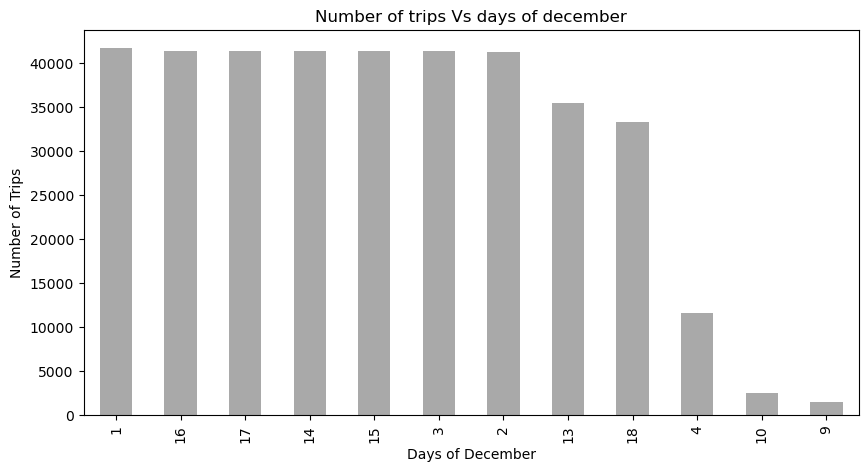

In [13]:
# Trips in format of dates of december
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

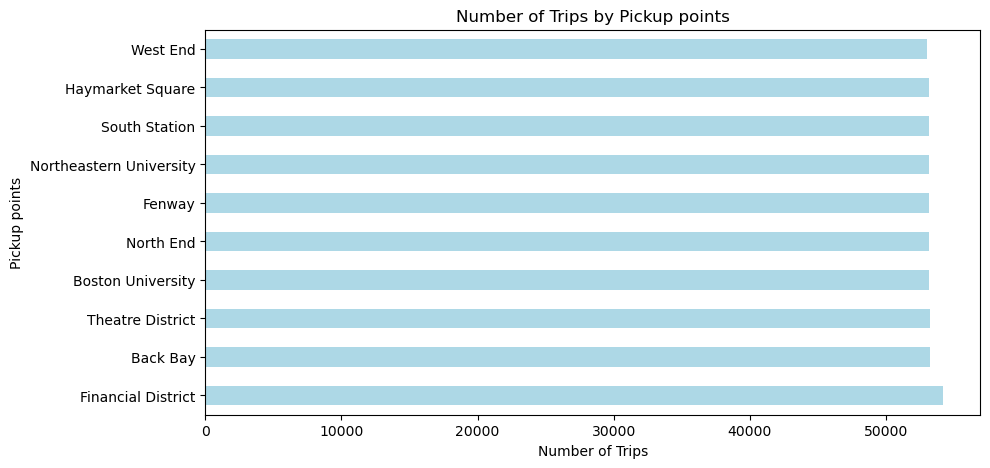

In [14]:
# No. of trips by pickup points
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

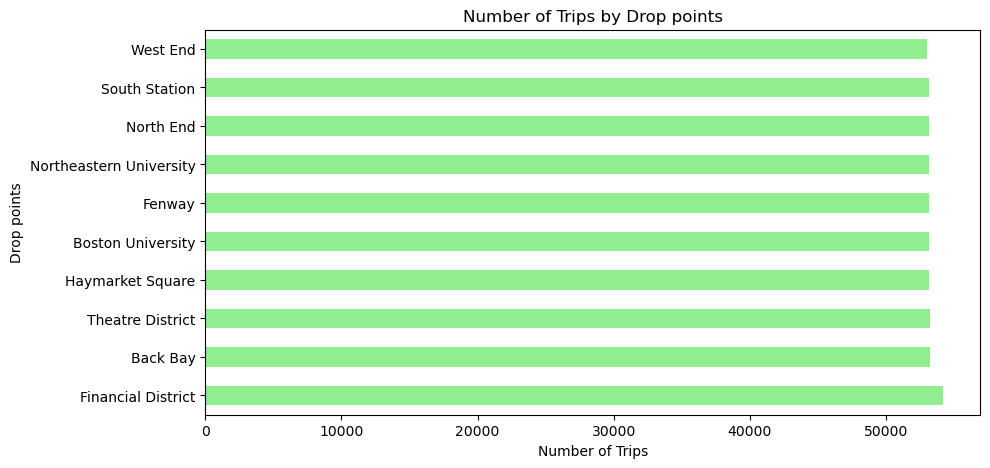

In [15]:
# No. of trips by drop points
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

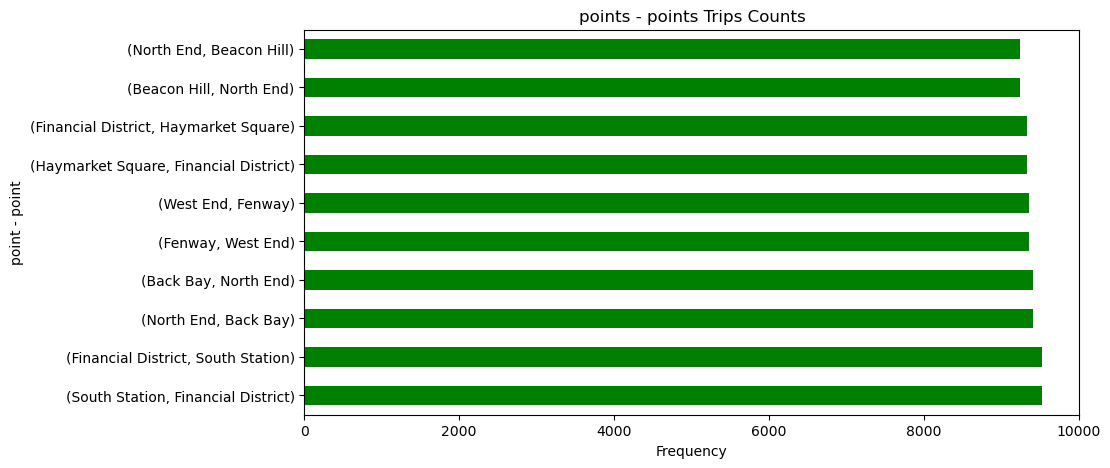

In [16]:
# point to point trips count
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

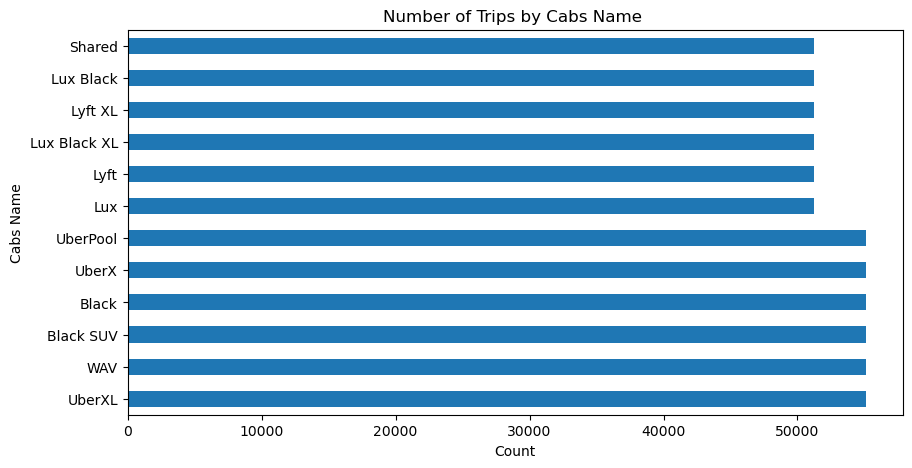

In [17]:
# No. of trips by cabs name
cabs = data2['name'].value_counts()
cabs.plot(kind='barh',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() # data transformation tool

In [19]:
# Transforming data into a format which model will understand
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

In [20]:
# assinging a number to all types of cabs
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [21]:
# assinging a number to all types of drop of places 
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [22]:
# assinging a number to all types of weathers
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [23]:
# assigning a number to uber and lyft
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [24]:
# Checking the dataset remain
len(data2[data2['cab_type']==1])

330568

In [25]:
# Creating a training Dataset

In [26]:
# giving data to train with removing the perdiction thing
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)# giving it the dataset without cab_type and price
y = data2[data2['cab_type']==1]['price']# assigning the values of price to y

In [27]:
# 20% data in test and 80% data in trainig and taking the bunch of 42 ramdomly
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

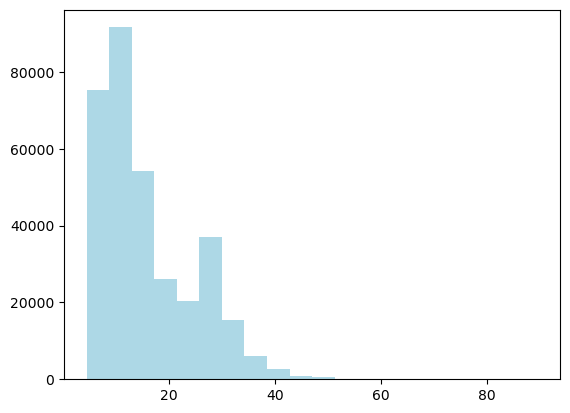

In [28]:
# showing the max and min price
plt.hist(y, bins=20, color = 'lightblue')
plt.show()

In [45]:
# from sklearn.model_selection import train_test_split
from   sklearn.feature_selection   import   RFE
from   sklearn   import  ensemble
from sklearn.metrics import mean_squared_error
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor
from sklearn.metrics import r2_score

In [30]:
#  defining a function that will fit and test the model:
def train_test_models(x_train, y_train, x_test, y_test):
    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test)) 
    return gbm_model

In [31]:
# creates a new dataset with only those selected features,, re-trains the provided model on this reduced feature set,
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.1, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [32]:
# dry run of the model
model = train_test_models(x_train, y_train, x_test, y_test)

GBM... 
0.9519521889242386


In [33]:
# Running model in a loop with different features
model_list = [model]
n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f"{model}->{nf} features")
        feature_eliminate(model, x, y, nf)

GradientBoostingRegressor(max_depth=5, n_estimators=200)->5 features
0.954044083531511
GradientBoostingRegressor(max_depth=5, n_estimators=200)->10 features
0.9535805537720177
GradientBoostingRegressor(max_depth=5, n_estimators=200)->15 features
0.9535904361317963
GradientBoostingRegressor(max_depth=5, n_estimators=200)->20 features
0.9536983906881843


In [34]:
# pridicting the price of uber ride
lr_model=train_test_models(x_train, y_train, x_test, y_test)
predict=lr_model.predict(x_test)
print("Predicted Price\n",predict)

GBM... 
0.9519386870792982
Predicted Price
 [ 6.90848307  7.28534283 18.14532489 ... 34.13865567  9.3400437
  8.5928691 ]


In [35]:
# Setting prices into linst so it can be easy to show graphically
prices = y_test.values
prices = prices.tolist()
predicted_price = predict.tolist()
prices
# predicted_price

[5.5,
 8.0,
 18.5,
 20.5,
 23.5,
 9.5,
 31.5,
 9.5,
 8.5,
 9.5,
 30.5,
 7.0,
 8.5,
 6.5,
 30.5,
 15.0,
 10.0,
 33.0,
 13.5,
 27.0,
 29.5,
 10.5,
 26.5,
 8.0,
 20.5,
 13.5,
 30.5,
 26.0,
 8.5,
 11.0,
 7.5,
 11.5,
 14.0,
 27.5,
 5.5,
 23.0,
 9.5,
 16.0,
 32.0,
 16.5,
 18.0,
 15.5,
 27.5,
 9.5,
 34.0,
 8.0,
 27.5,
 7.5,
 6.5,
 6.0,
 20.5,
 11.0,
 24.0,
 10.5,
 25.0,
 13.0,
 23.0,
 13.5,
 23.5,
 9.5,
 9.5,
 18.5,
 7.0,
 29.5,
 23.0,
 17.5,
 28.0,
 29.5,
 30.5,
 26.0,
 7.5,
 19.5,
 16.0,
 22.5,
 23.0,
 37.0,
 18.5,
 31.5,
 10.0,
 8.5,
 17.5,
 28.0,
 6.5,
 27.5,
 9.5,
 7.5,
 14.0,
 9.5,
 9.0,
 20.5,
 27.0,
 7.5,
 14.0,
 8.0,
 8.5,
 25.0,
 10.0,
 8.0,
 19.5,
 9.5,
 10.5,
 21.5,
 7.0,
 25.0,
 16.5,
 10.5,
 7.5,
 28.5,
 32.0,
 29.5,
 6.5,
 8.0,
 19.5,
 26.0,
 8.5,
 16.5,
 20.5,
 7.5,
 17.5,
 11.0,
 33.0,
 9.0,
 24.0,
 8.5,
 16.0,
 23.0,
 9.0,
 9.5,
 27.0,
 8.5,
 19.5,
 8.0,
 15.0,
 16.0,
 8.5,
 8.5,
 15.0,
 41.5,
 12.0,
 10.5,
 11.0,
 27.5,
 16.0,
 11.0,
 29.5,
 9.0,
 11.0,
 24.5,
 15.0,
 16.0,

In [36]:
mse = np.mean(((predicted_price - y_test) ** 2))
mse

3.4789586431736264

In [37]:
mse = mean_squared_error(prices, predicted_price)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.865196676807469


In [47]:
r2 = r2_score(y_test, predicted_price)
r2

0.9519386870792982

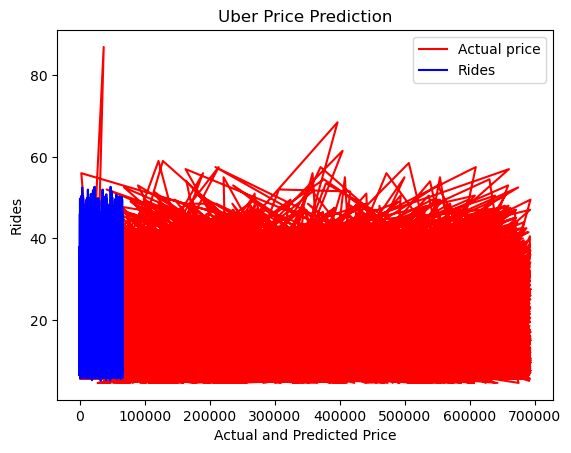

In [42]:
plt.plot(y_test, color='red', label='Actual price')
plt.plot(predicted_price, color='blue', label='Rides')
plt.title('Uber Price Prediction')
plt.xlabel('Actual and Predicted Price')
plt.ylabel('Rides')
plt.legend()
plt.show()